## Lesson 3: Visualizing Embeddings

In [1]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib
!{sys.executable} -m pip install --upgrade mplcursors
!{sys.executable} -m pip install --upgrade ipympl
!{sys.executable} -m pip install --upgrade seaborn


#### Project environment setup

- Load credentials and relevant Python Libraries

In [2]:
"""
#from utils import authenticate
#credentials, PROJECT_ID = authenticate() #Get credentials and project ID

!gcloud auth application-default login
"""

'\n#from utils import authenticate\n#credentials, PROJECT_ID = authenticate() #Get credentials and project ID\n\n!gcloud auth application-default login\n'

In [3]:
"""
import os
PROJECT_ID = "seismic-bucksaw-396319"
#credentials = "/Users/ytchen/.config/gcloud/application_default_credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/ytchen/.config/gcloud/application_default_credentials.json"
"""

'\nimport os\nPROJECT_ID = "seismic-bucksaw-396319"\n#credentials = "/Users/ytchen/.config/gcloud/application_default_credentials.json"\nos.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/ytchen/.config/gcloud/application_default_credentials.json"\n'

In [4]:
"""
#from google.oauth2 import service_account
#credentials = service_account.Credentials.from_service_account_file('/Users/ytchen/.config/gcloud/application_default_credentials.json')
"""

"\n#from google.oauth2 import service_account\n#credentials = service_account.Credentials.from_service_account_file('/Users/ytchen/.config/gcloud/application_default_credentials.json')\n"

In [5]:
"""
REGION = 'us-central1'
"""

"\nREGION = 'us-central1'\n"

#### Enter project details

In [6]:
"""
# Import and initialize the Vertex AI Python SDK

import vertexai
vertexai.init(project=PROJECT_ID, 
              location=REGION, 
              credentials = credentials)
"""

'\n# Import and initialize the Vertex AI Python SDK\n\nimport vertexai\nvertexai.init(project=PROJECT_ID, \n              location=REGION, \n              credentials = credentials)\n'

In [2]:
#import google.generativeai as palm
import os
import pprint
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#palm.configure(api_key=os.environ['API_KEY'])


## Embeddings capture meaning

In [3]:
from dotenv import load_dotenv, find_dotenv
import os
import numpy as np

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage

def get_text_embedding(txt):
    #client = MistralClient(api_key=api_key, endpoint=dlai_endpoint)
    client = MistralClient(api_key=os.getenv("MISTRAL_API_KEY"))
    embeddings_batch_response = client.embeddings(model="mistral-embed", input=txt)
    return embeddings_batch_response.data[0].embedding

In [4]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [3]:
"""
import numpy as np
from vertexai.language_models import TextEmbeddingModel

embedding_model = TextEmbeddingModel.from_pretrained(
    "textembedding-gecko@001")
"""

'\nimport numpy as np\nfrom vertexai.language_models import TextEmbeddingModel\n\nembedding_model = TextEmbeddingModel.from_pretrained(\n    "textembedding-gecko@001")\n'

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [4]:
"""
for model in palm.list_models():
  if 'embedText' in model.supported_generation_methods:
    print(model.name)

model = "models/embedding-gecko-001"
"""

models/embedding-gecko-001


In [5]:
embeddings = []
for input_text in input_text_lst_news:
    #emb = embedding_model.get_embeddings(
    #    [input_text])[0].values
    #embeddings.append(emb)
    #emb = palm.generate_embeddings(model=model, text=input_text)
    #embeddings.append(emb['embedding'])
    emb = get_text_embedding(input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings)

In [6]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)


Shape: (7, 1024)
[[-0.02981567 -0.00123692  0.02830505 ... -0.03808594 -0.00756836
   0.0085907 ]
 [-0.01074219  0.0246582   0.06304932 ...  0.00858307  0.0091629
   0.0357666 ]
 [-0.02770996  0.00171757  0.01532745 ...  0.0019207   0.0236969
   0.02598572]
 ...
 [-0.01270294  0.02572632  0.03817749 ...  0.0122757   0.04733276
   0.00696182]
 [-0.01496887  0.01889038  0.03240967 ... -0.02546692  0.01262665
   0.0368042 ]
 [ 0.01075745  0.02632141  0.03790283 ... -0.00213623  0.02186584
  -0.01402283]]


#### Reduce embeddings from 1024 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization. 

In [7]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)


In [8]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.30840992  0.10096067]
 [ 0.40171712  0.01841976]
 [ 0.30959734  0.04819866]
 [-0.22487839 -0.40500192]
 [-0.15225131 -0.35761572]
 [-0.34894788  0.43853491]
 [-0.2936468   0.15650364]]


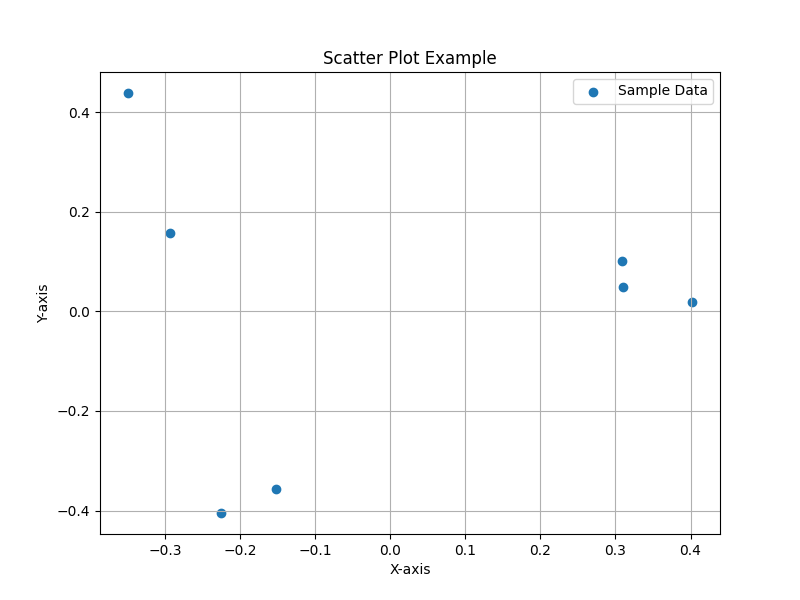

In [9]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

#from utils import plot_2D
#plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

#plt.plot(new_values[:,0], new_values[:,1])

plt.figure(figsize=(8, 6))
plt.scatter(new_values[:,0], new_values[:,1], label='Sample Data')
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [10]:
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [11]:
embeddings = []
for input_text in input_text_lst_sim:
    #emb = embedding_model.get_embeddings([input_text])[0].values
    #embeddings.append(emb)
    #emb = palm.generate_embeddings(model=model, text=input_text)
    #embeddings.append(emb['embedding'])
    emb = get_text_embedding(input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

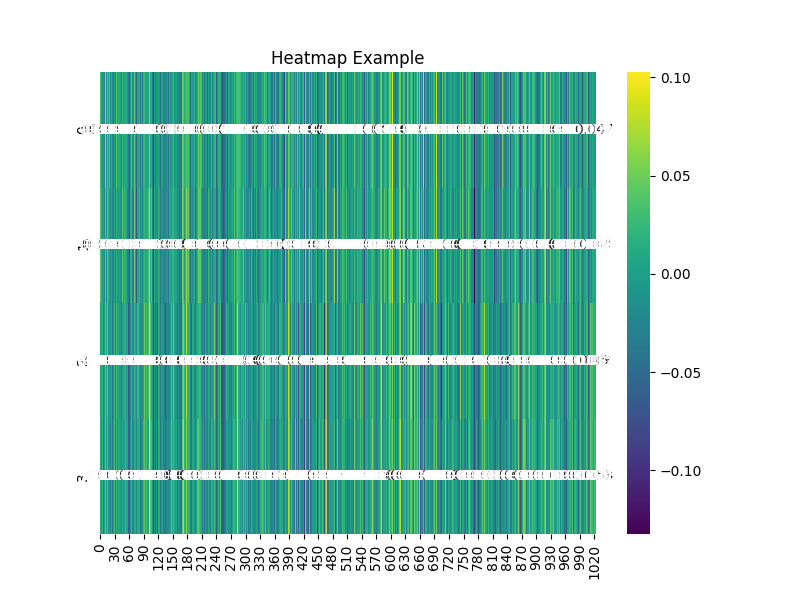

In [12]:
#from utils import plot_heatmap
import seaborn as sns

y_labels = input_text_lst_sim

# Plot the heatmap
#plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(embeddings_array, annot=True, cmap='viridis')  # 'annot=True' to annotate each cell with its value
plt.title('Heatmap Example')

# Display the plot
plt.show()

Note: the heat map won't show everything because there are 1024 columns to show.  To adjust the heat map with your mouse:
- Hover your mouse over the heat map.  Buttons will appear on the left of the heatmap.  Click on the button that has a vertical and horizontal double arrow (they look like axes).
- Left click and drag to move the heat map left and right.
- Right click and drag up to zoom in.
- Right click and drag down to zoom out.

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]]) 

In [15]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

He couldn’t desert 
          his post at the power plant.
The power plant needed 
          him at the time.
[[0.90268961]]


In [16]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

He couldn’t desert 
          his post at the power plant.
Desert plants can 
          survive droughts.
[[0.79138587]]
